### Statistics from Stock Data

Jay Urbain, PhD
7/3/2018

In this lab we will load stock data into a Pandas Dataframe and calculate some basc statistics on it. 

We will be working with stock data from Google, Apple, and Amazon. All the stock data was downloaded for you into the `data` sub-directory in CSV format. In your `data` sub-directory, you should have files for Google, Apple, and Amazon: GOOG.csv, AAPL.csv and AMZN.csv respectively.

All the files contain 7 columns of data:

**Date Open High Low Close Adj_Close Volume**

First, inspect the file to see what the data looks like. We can verify the format of the data, and that the header column is included in the data.

In [5]:
!head 'data/GOOG.csv'

Date,Open,High,Low,Close,Adj Close,Volume
2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400
2004-08-26,52.135906,53.626213,51.991844,53.606342,53.606342,7148200
2004-08-27,53.700729,53.959049,52.503513,52.732029,52.732029,6258300
2004-08-30,52.299839,52.404160,50.675404,50.675404,50.675404,5235700
2004-08-31,50.819469,51.519913,50.749920,50.854240,50.854240,4954800


Read in any of the above CSV files into a DataFrame and see what the data looks like.

In [8]:
# We import pandas into Python
import pandas as pd

# We read in a stock data data file into a data frame and see what it looks like
df = pd.read_csv('data/GOOG.csv')

# We display the first 5 rows of the DataFrame
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.676899,51.693783,47.669952,49.845802,49.845802,44994500
1,2004-08-20,50.178635,54.187561,49.925285,53.805050,53.805050,23005800
2,2004-08-23,55.017166,56.373344,54.172661,54.346527,54.346527,18393200
3,2004-08-24,55.260582,55.439419,51.450363,52.096165,52.096165,15361800
4,2004-08-25,52.140873,53.651051,51.604362,52.657513,52.657513,9257400


In [9]:
df.index

RangeIndex(start=0, stop=3313, step=1)

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

The Dataframe is has automatically labeled the row indices using integers, and has labeled the columns of the DataFrame using the names of the columns in the CSV files.

#### ToDo

Load the stock data from Google, Apple, and Amazon into separte DataFrames. 

For each stock data we are only interested in loading the `Date` and `Adj Close` columns into the Dataframe. In addtion, you want to use the `Date` column as your row index. 

You also want the DataFrame to recognize the dates as actual dates (year/month/day) and not as strings. For each stock, you can accomplish all of this in just one line of code by using the appropiate keywords in the `pd.read_csv()` function. Hints:

* Use the `index_col` keyword to indicate which column you want to use as an index. For example `index_col = ['Open']`

* Set the `parse_dates` keyword equal to `True` to convert the Dates into real dates of the form year/month/day

* Use the `usecols` keyword to select which columns you want to load into the DataFrame. For example `usecols = ['Open', 'High']`

Fill in the code below:

In [13]:
# Load the Google stock data into a DataFrame
google_stock = pd.read_csv('data/GOOG.csv', parse_dates=True, index_col='Date', usecols=['Date','Adj Close'])
# google_stock.head()
# type(google_stock.index)
                                                                                      
# Load the Apple stock data into a DataFrame
apple_stock = pd.read_csv('data/AAPL.csv', parse_dates=True, index_col='Date', usecols=['Date','Adj Close'])

# Load the Amazon stock data into a DataFrame
amazon_stock = pd.read_csv('data/AMZN.csv', parse_dates=True, index_col='Date', usecols=['Date','Adj Close'])

Verify that you have loaded the data correctly by displaying the head of the DataFrames.

In [14]:
# Display the google_stock DataFrame
google_stock.head()

,Adj Close
Date,
2004-08-19,49.845802
2004-08-20,53.805050
2004-08-23,54.346527
2004-08-24,52.096165
2004-08-25,52.657513


`join` the three DataFrames to create a single new DataFrame that contains all fo the `Adj Close` values for all three stocks. 

We will start by creating an empty DataFrame that has as row indices calendar days between `2000-01-01`  and `2016-12-31` using the `pd.date_range()` function to create the calendar dates first and then we will create a DataFrame that uses those dates as row indices:

In [15]:
# We create calendar dates between '2000-01-01' and  '2016-12-31'
dates = pd.date_range('2000-01-01', '2016-12-31')

# We create and empty DataFrame that uses the above dates as indices
all_stocks = pd.DataFrame(index = dates)
all_stocks.head()

""
2000-01-01
2000-01-02
2000-01-03
2000-01-04
2000-01-05


#### ToDo

Now join the the individual DataFrames `google_stock`, `apple_stock`, and `amazon_stock`, to the `all_stocks` DataFrame. 

Note: before you do this, you need to change the name of the `Adj Close` column in each of the three dataframes. Column labels in the `all_stocks` dataframe must be unique. 

Change the column label `Adj Close` of each individual dataframe to the name of the corresponding stock. You can do this by using the `pd.DataFrame.rename()` function. 

In [92]:
# hint
pd.DataFrame.rename?

In [16]:
# Change the Adj Close column label to Google
google_stock = google_stock.rename(columns={'Adj Close': 'Google Stock'})

# Change the Adj Close column label to Apple
apple_stock = apple_stock.rename(columns={'Adj Close': 'Apple Stock'})

# Change the Adj Close column label to Amazon
amazon_stock = amazon_stock.rename(columns={'Adj Close': 'Amazon Stock'})

You can check that the column labels have been changed correctly by displaying the datadrames

In [17]:
# We display the google_stock DataFrame
google_stock.head()

,Google Stock
Date,
2004-08-19,49.845802
2004-08-20,53.805050
2004-08-23,54.346527
2004-08-24,52.096165
2004-08-25,52.657513


Now that we have unique column labels, join the individual DataFrames to the `all_stocks` DataFrame using the `dataframe.join()` function. 

The function `dataframe1.join(dataframe2)` joins `dataframe1` with `dataframe2`. Join each dataframe one by one to the `all_stocks` dataframe. 

In [18]:
# We join the Google stock to all_stocks
all_stocks = all_stocks.join(google_stock)

# We join the Apple stock to all_stocks
all_stocks = all_stocks.join(apple_stock)

# We join the Amazon stock to all_stocks
all_stocks = all_stocks.join(amazon_stock)

You can check that the dataframes have been joined correctly by displaying the `all_stocks`  dataframe

In [20]:
# We display the google_stock DataFrame
all_stocks.head(5)

,Google Stock,Apple Stock,Amazon Stock
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,NaN,3.596616,89.3750
2000-01-04,NaN,3.293384,81.9375
2000-01-05,NaN,3.341579,69.7500


#### ToDo

Before calculating statistics on the stock data, we need to deal with *NaN* values. In the space below check if there are any *NaN* values in the `all_stocks`  dataframe. If there are any, remove any rows that have *NaN* values:

In [21]:
# Check if there are any NaN values in the all_stocks dataframe
print('isnull', all_stocks[all_stocks.isnull()].head())

# Remove any rows that contain NaN values
all_stocks.dropna(axis='rows', inplace=True)
all_stocks.head()

isnull             Google Stock  Apple Stock  Amazon Stock
2000-01-01           NaN          NaN           NaN
2000-01-02           NaN          NaN           NaN
2000-01-03           NaN          NaN           NaN
2000-01-04           NaN          NaN           NaN
2000-01-05           NaN          NaN           NaN


,Google Stock,Apple Stock,Amazon Stock
2004-08-19,49.845802,1.973460,38.630001
2004-08-20,53.805050,1.979244,39.509998
2004-08-23,54.346527,1.997236,39.450001
2004-08-24,52.096165,2.053144,39.049999
2004-08-25,52.657513,2.123831,40.299999


Now that you have eliminated any *NaN* values we can now calculate some basic statistics on the stock prices. Fill in the code below

In [22]:
# Print the average stock price for each stock
print('Google Stock Mean', all_stocks['Google Stock'].mean())
print('Apple Stock Mean', all_stocks['Apple Stock'].mean())
print('Amazon Stock Mean', all_stocks['Amazon Stock'].mean())

# Print the median stock price for each stock
print()
print('Google Stock Median', all_stocks['Google Stock'].median())
print('Apple Stock Median', all_stocks['Apple Stock'].median())
print('Amazon Stock Median', all_stocks['Amazon Stock'].median())

# Print the standard deviation of the stock price for each stock  
print()
print('Google Stock Std', all_stocks['Google Stock'].std())
print('Apple Stock Std', all_stocks['Apple Stock'].std())
print('Amazon Stock Std', all_stocks['Amazon Stock'].std())

# Print the correlation between stocks
print()
print('Correlation google vs. apple', all_stocks['Google Stock'].corr(all_stocks['Apple Stock']))
print('Correlation google vs. amazon', all_stocks['Google Stock'].corr(all_stocks['Amazon Stock']))
print('Correlation aaple vs. amazon', all_stocks['Apple Stock'].corr(all_stocks['Amazon Stock']))


Google Stock Mean 347.4202289595506
Apple Stock Mean 47.736018350240776
Amazon Stock Mean 216.59817680481538

Google Stock Median 286.397247
Apple Stock Median 39.461483
Amazon Stock Median 161.820007

Google Stock Std 187.67159618519085
Apple Stock Std 37.42155482402386
Amazon Stock Std 199.12979235695605

Correlation google vs. apple 0.9002417493063724
Correlation google vs. amazon 0.952444259883894
Correlation aaple vs. amazon 0.8863213505974568


Rolling statistics can be very helpful in analyzing temporal data.  Calculate the rolling mean (moving average) of the Google stock price by using the Pandas `dataframe.rolling().mean()` method. 

The `dataframe.rolling(N).mean()` calculates the rolling mean over an `N`-day window. In other words, we can take a look at the average stock price every `N`  days using the above method. 

Fill in the code below to calculate the average stock price every 150 days for Google stock

In [23]:
# We compute the rolling mean using a 150-Day window for Google stock
rollingMean = all_stocks['Google Stock'].rolling(150).mean()
rollingMean

2004-08-19           NaN
2004-08-20           NaN
2004-08-23           NaN
2004-08-24           NaN
2004-08-25           NaN
2004-08-26           NaN
2004-08-27           NaN
2004-08-30           NaN
2004-08-31           NaN
2004-09-01           NaN
2004-09-02           NaN
2004-09-03           NaN
2004-09-07           NaN
2004-09-08           NaN
2004-09-09           NaN
2004-09-10           NaN
2004-09-13           NaN
2004-09-14           NaN
2004-09-15           NaN
2004-09-16           NaN
2004-09-17           NaN
2004-09-20           NaN
2004-09-21           NaN
2004-09-22           NaN
2004-09-23           NaN
2004-09-24           NaN
2004-09-27           NaN
2004-09-28           NaN
2004-09-29           NaN
2004-09-30           NaN
                 ...    
2016-11-17    747.646401
2016-11-18    747.690468
2016-11-21    747.800668
2016-11-22    747.861534
2016-11-23    748.143001
2016-11-25    748.399867
2016-11-28    748.800534
2016-11-29    749.233867
2016-11-30    749.680667


We can also plot the rolling mean by plotting the data in our dataframe using **Matplotlib** to visualize the data. For now we will just import matplotlib and plot the Google stock data on top of the rolling mean. You can play around by changing the rolling mean window and see how the plot changes. 

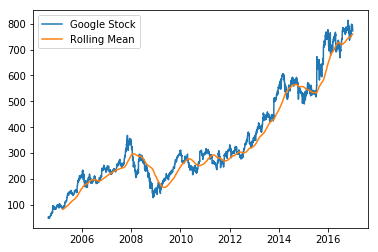

In [24]:
# this allows plots to be rendered in the notebook
%matplotlib inline 

# We import matplotlib into Python
import matplotlib.pyplot as plt


# We plot the Google stock data
plt.plot(all_stocks['Google Stock'])

# We plot the rolling mean ontop of our Google stock data
plt.plot(rollingMean)
plt.legend(['Google Stock', 'Rolling Mean'])
plt.show()